## Домашнее задание 1 (5 баллов)

Все задания ниже имеют равный вес (5/10).

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [1]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    # Округление по правилам арифметики
    return round(np.sum(weights.dot(marks.T)))

In [3]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [4]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [7]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [8]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    pattern = np.where(abs(array1 - array2) <= precision, array1, 0)
    result = np.where(pattern != 0)[0]
    return result


In [9]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [10]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [11]:
def block_matrix(block: np.array) -> np.array:
    block = np.hstack((block, block))
    block = np.vstack((block, block))
    return block

In [12]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [13]:
def diag_prod(matrix: np.array) -> int:
    temp = np.diag(matrix)
    temp = np.where(temp == 0, 1, temp)
    return np.prod(temp)


In [14]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашей![attention.png](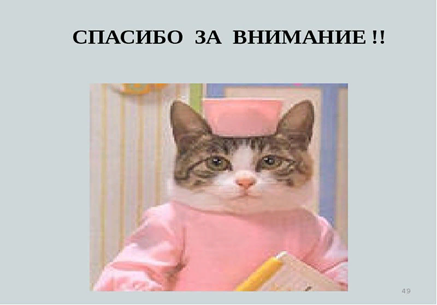![attention.png](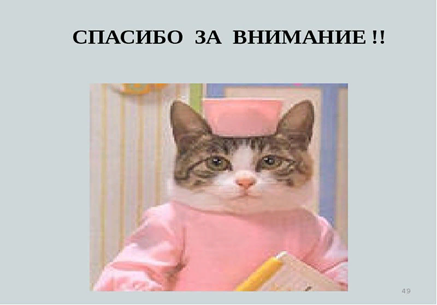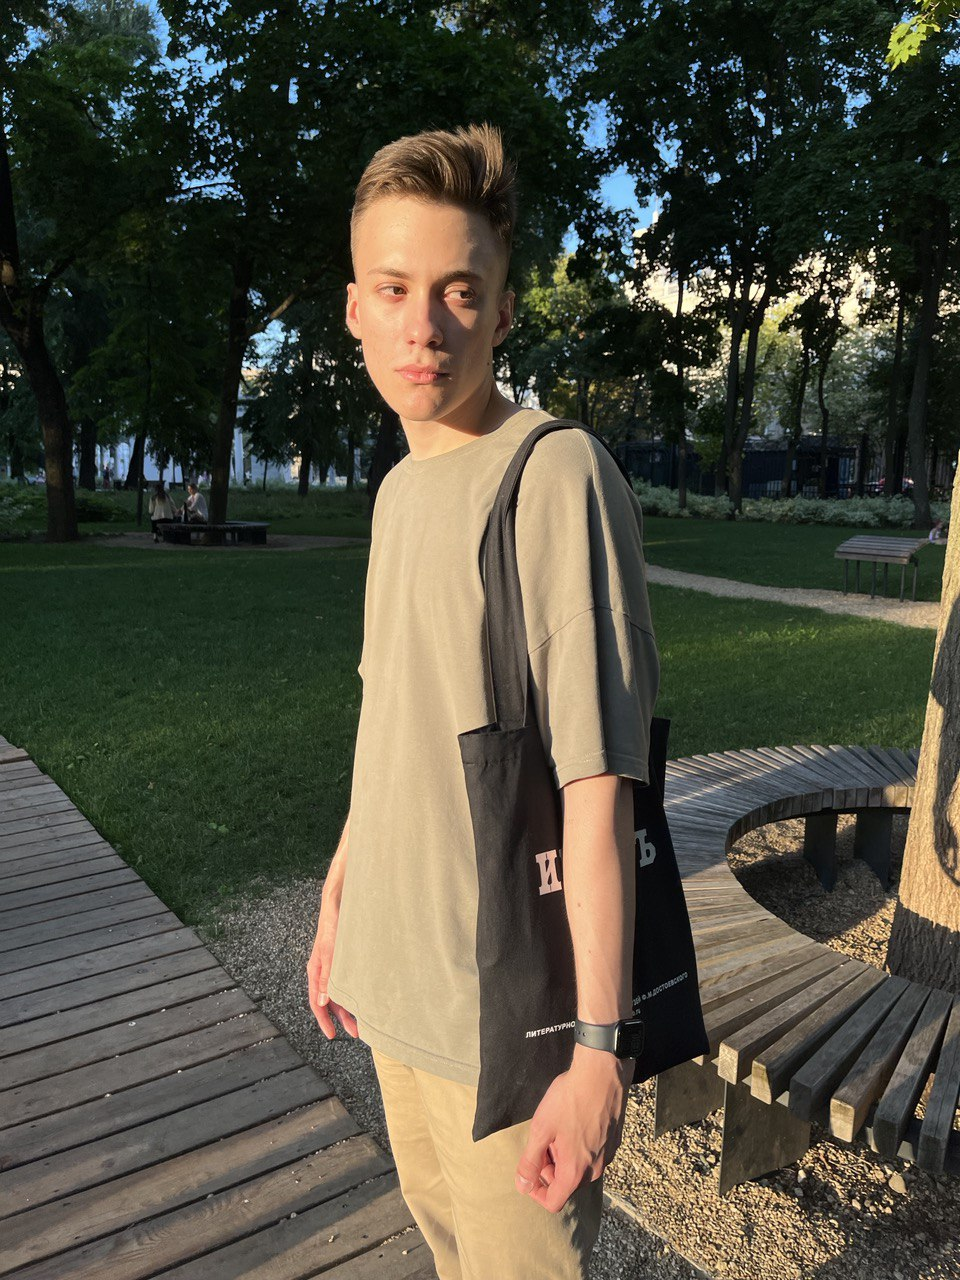)) матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [15]:
def normalize(matrix: np.array) -> np.array:
    means = np.mean(matrix, axis=0)
    stddev = np.std(matrix, axis=0)
    # Будем считать, что если среднеквадратическое отклонение равно 0, то величина уже нормирована и делить на отклонение не надо (<=> разделить столбец на 1)
    stddev = np.where(stddev == 0, 1, stddev)
    return(matrix - means) / stddev


In [16]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [17]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### Задание 7

Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. <br>
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [18]:
def prevZeroMax(matrix: np.array) -> int:
    zeros_positions = matrix == 0
    return np.max(matrix[1:][zeros_positions[:-1]])

In [19]:
coefs = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

prevZeroMax(coefs)
assert  prevZeroMax(coefs) == 5

In [20]:
coefs = np.array([1, 0, 1, 0, 4, 2, 0])

assert prevZeroMax(coefs) == 4


### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [21]:
def make_symmetric(matrix: np.array) -> np.array:
    temp = matrix + matrix.T
    return temp - np.diag(np.diag(temp)) / 2


In [22]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

make_symmetric(matrix)
assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [23]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [24]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.repeat(np.arange(a, b+1, 1), m).reshape(-1, m).T

In [25]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [26]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25. P.s. так как нам нельзя использовать условные операторы, будем считать, что на вход не подаются нулевые векторы

In [27]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return np.sum(vec1*vec2)/ (np.sqrt(np.sum(vec1 * vec1)) * np.sqrt(np.sum(vec2 * vec2)))

In [28]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [29]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

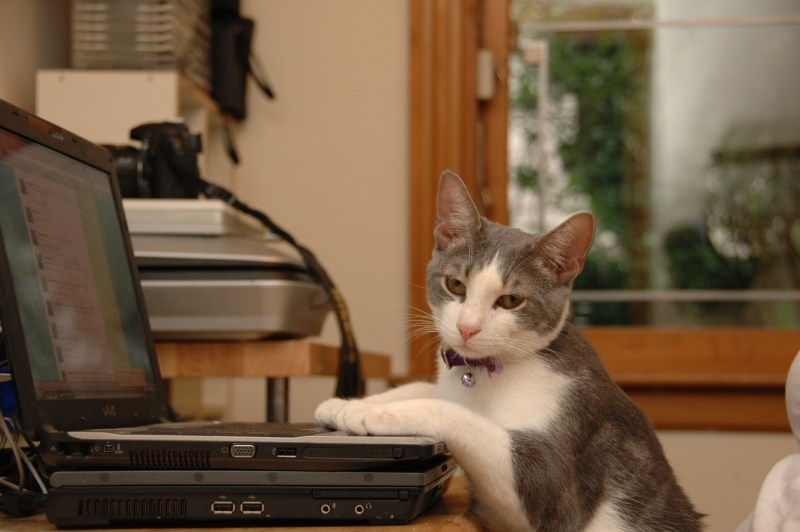